# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Options

In [2]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)

In [3]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [5]:
train_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'train.hdf5', "r+"),
                                 input_pipe=input_pipe, rot_mult=16)

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 16.849s 


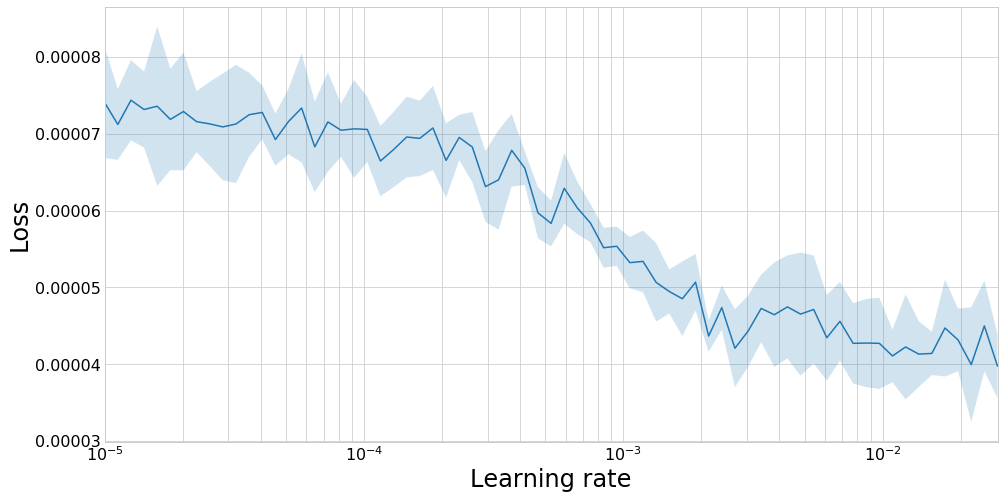

______________________________________



In [6]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [7]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode

1 New best found: 3.870725273445714e-05
2 New best found: 3.665839077439159e-05
3 New best found: 3.585649774031481e-05
4 New best found: 3.555125167622464e-05
5 New best found: 3.518552132009063e-05
6 New best found: 3.446649940597126e-05
7 New best found: 3.437958168069599e-05
11 New best found: 3.364396726974519e-05
13 New best found: 3.35931880530552e-05
14 New best found: 3.342842155689141e-05
15 New best found: 3.338663799513597e-05
22 New best found: 3.328418279998004e-05
24 New best found: 3.30354534991784e-05
26 New best found: 3.288811834790977e-05
27 New best found: 3.2724793255329134e-05
29 New best found: 3.268382987589575e-05
30 New best found: 3.265071874629939e-05
31 New best found: 3.264596958033508e-05
45 New best found: 3.260723550192779e-05
46 New best found: 3.2500398252159356e-05
50 New best found: 3.247480175486999e-05
51 New best found: 3.2443240073916

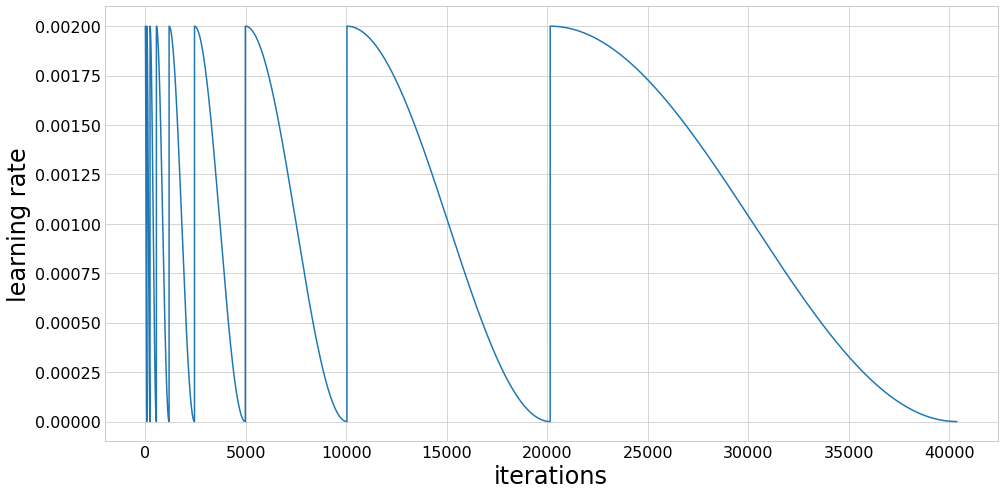

Fold took 452.786s

Training model 2 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.232916). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116798). Check your callbacks.
  % delta_t_median)


1 New best found: 3.992542031083414e-05
2 New best found: 3.798495161409027e-05
3 New best found: 3.64343330853045e-05
4 New best found: 3.6135608682256005e-05
5 New best found: 3.5699494840551644e-05
6 New best found: 3.4782868834339265e-05
7 New best found: 3.465942363876353e-05
10 New best found: 3.459359416269633e-05
11 New best found: 3.406218662283849e-05
12 New best found: 3.401988527123506e-05
13 New best found: 3.359252240529754e-05
14 New best found: 3.3582734763632964e-05
15 New best found: 3.349272581683719e-05
23 New best found: 3.316438091885865e-05
25 New best found: 3.2884265517154425e-05
27 New best found: 3.284713598677824e-05
28 New best found: 3.276773905599348e-05
29 New best found: 3.269923050574287e-05
30 New best found: 3.2696993451441215e-05
31 New best found: 3.269615222054426e-05
44 New best found: 3.2557026777362466e-05
49 New best found: 3.2485848660310685e-05
51 New best found: 3.2390317652476087e-05
53 New best found: 3.236053466170499e-05
54 New best fou

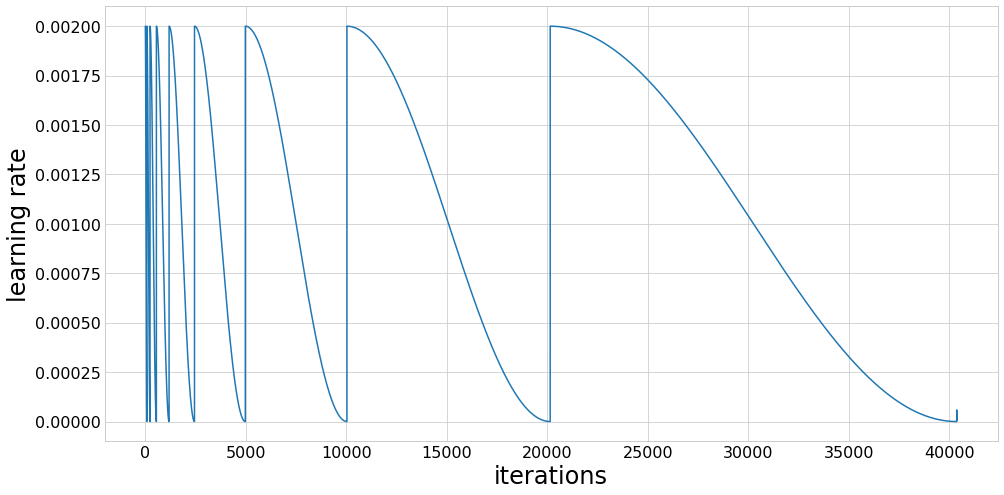

Fold took 455.888s

Training model 3 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.246861). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123774). Check your callbacks.
  % delta_t_median)


1 New best found: 3.832314536784656e-05
2 New best found: 3.654359727434548e-05
3 New best found: 3.5510550297884095e-05
4 New best found: 3.549555227248029e-05
5 New best found: 3.4772705007048195e-05
6 New best found: 3.4232255353745426e-05
7 New best found: 3.4062963475590454e-05
10 New best found: 3.4028394832048085e-05
11 New best found: 3.35647892515256e-05
12 New best found: 3.3280108871471286e-05
13 New best found: 3.300350309343269e-05
14 New best found: 3.2821251641226706e-05
15 New best found: 3.2798381705108886e-05
24 New best found: 3.252865675278079e-05
26 New best found: 3.248163061264439e-05
27 New best found: 3.240478371910716e-05
28 New best found: 3.22959871981518e-05
29 New best found: 3.223915937799601e-05
30 New best found: 3.220902795604875e-05
31 New best found: 3.220507950142679e-05
47 New best found: 3.202643799008758e-05
50 New best found: 3.182747933713535e-05
51 New best found: 3.182034167092147e-05
55 New best found: 3.1811033879223114e-05
56 New best foun

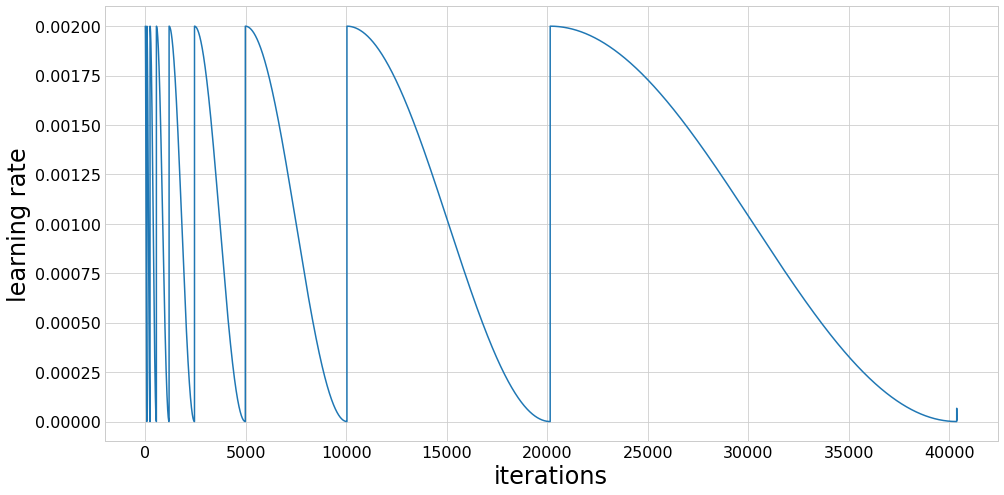

Fold took 471.745s

Training model 4 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.247877). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124258). Check your callbacks.
  % delta_t_median)


1 New best found: 4.001710311713396e-05
2 New best found: 3.813776643801248e-05
3 New best found: 3.675205921172164e-05
4 New best found: 3.6544188270636366e-05
5 New best found: 3.57546848943457e-05
6 New best found: 3.4994871383241846e-05
7 New best found: 3.499301211995771e-05
10 New best found: 3.478420499159256e-05
11 New best found: 3.4265381449949926e-05
13 New best found: 3.405281945451861e-05
14 New best found: 3.385838491813047e-05
15 New best found: 3.3816176280379294e-05
23 New best found: 3.368796660361113e-05
25 New best found: 3.36116104197572e-05
26 New best found: 3.3421879935485774e-05
27 New best found: 3.3297965402016415e-05
29 New best found: 3.3218396941083484e-05
30 New best found: 3.3180840073327997e-05
31 New best found: 3.316981541865971e-05
48 New best found: 3.3129562571411955e-05
49 New best found: 3.3037154015619305e-05
51 New best found: 3.2847401425533465e-05
53 New best found: 3.283842886885395e-05
54 New best found: 3.277583230519667e-05
56 New best fo

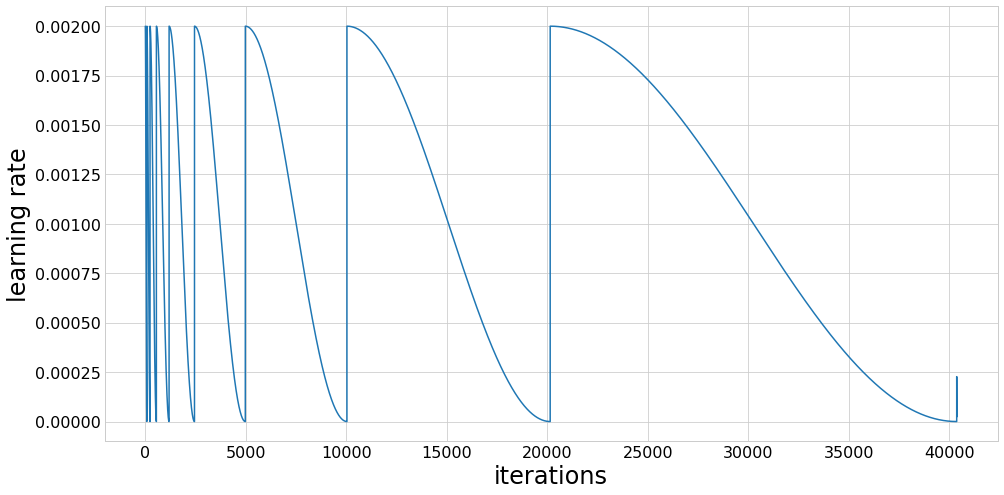

Fold took 480.871s

Training model 5 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.321328). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161026). Check your callbacks.
  % delta_t_median)


1 New best found: 3.868604790477548e-05
2 New best found: 3.577733488782542e-05
3 New best found: 3.5178878037550024e-05
5 New best found: 3.449112999660429e-05
6 New best found: 3.4040356561308724e-05
7 New best found: 3.4012671884556765e-05
9 New best found: 3.393057149223751e-05
10 New best found: 3.361908935476095e-05
12 New best found: 3.3280696743167935e-05
13 New best found: 3.289316619047895e-05
23 New best found: 3.273931467119837e-05
24 New best found: 3.2697608422313353e-05
25 New best found: 3.260849213693291e-05
26 New best found: 3.253554442198947e-05
27 New best found: 3.238310863089282e-05
28 New best found: 3.2291751603770534e-05
29 New best found: 3.2288304863322995e-05
49 New best found: 3.224636921804631e-05
52 New best found: 3.2150135371193756e-05
55 New best found: 3.2066533806209915e-05
59 New best found: 3.2042739957978486e-05
92 New best found: 3.2023995464260225e-05
98 New best found: 3.1949378101853655e-05
99 New best found: 3.189611158159096e-05
101 New bes

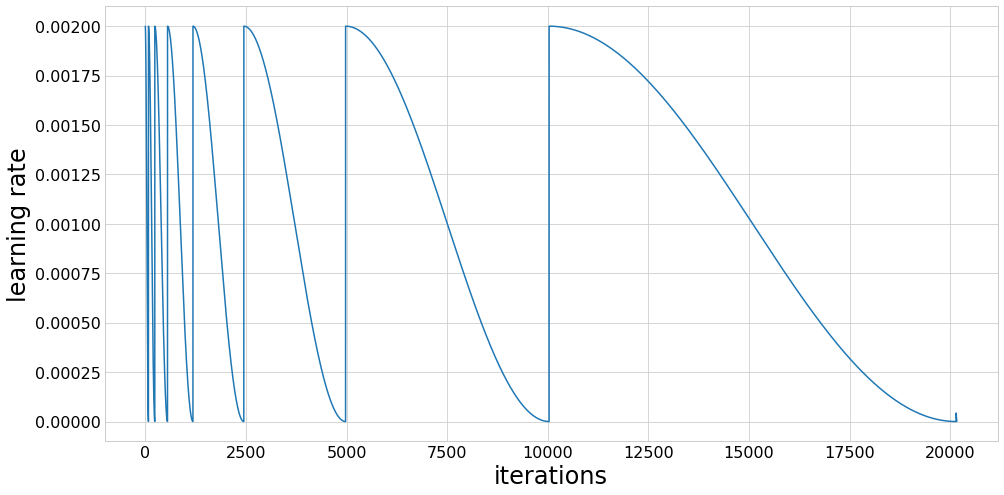

Fold took 258.198s

Training model 6 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.312516). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156639). Check your callbacks.
  % delta_t_median)


1 New best found: 3.9386010159621136e-05
2 New best found: 3.725345678435175e-05
3 New best found: 3.641631410559056e-05
4 New best found: 3.631262512233466e-05
5 New best found: 3.6039745126019085e-05
6 New best found: 3.499705344835112e-05
7 New best found: 3.489176676772671e-05
11 New best found: 3.47034926623431e-05
12 New best found: 3.440856639694396e-05
13 New best found: 3.405146127632252e-05
14 New best found: 3.3925508386662356e-05
15 New best found: 3.38886142527108e-05
22 New best found: 3.364121624565244e-05
24 New best found: 3.342339982904158e-05
25 New best found: 3.342307135861096e-05
26 New best found: 3.335986998558611e-05
27 New best found: 3.332685482620939e-05
28 New best found: 3.319447142581842e-05
29 New best found: 3.3141655387929074e-05
47 New best found: 3.308525818729708e-05
52 New best found: 3.2941416484502954e-05
54 New best found: 3.2783501771036594e-05
56 New best found: 3.267051559468117e-05
98 New best found: 3.2648017433111435e-05
103 New best found

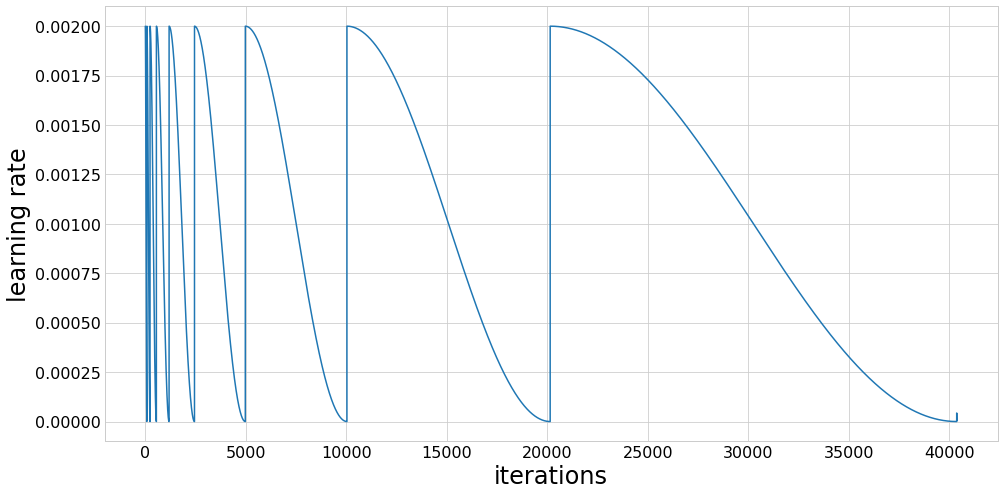

Fold took 502.052s

Training model 7 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.380139). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190471). Check your callbacks.
  % delta_t_median)


1 New best found: 3.937406220028506e-05
2 New best found: 3.6074332347612634e-05
3 New best found: 3.571644156582786e-05
4 New best found: 3.5168970044719524e-05
5 New best found: 3.5013965390313336e-05
6 New best found: 3.3791717798765503e-05
7 New best found: 3.363191680648046e-05
9 New best found: 3.3596179600744116e-05
10 New best found: 3.321954901251007e-05
12 New best found: 3.297326742981818e-05
13 New best found: 3.284612892900055e-05
14 New best found: 3.260738781891367e-05
15 New best found: 3.253441055013797e-05
20 New best found: 3.25192942886498e-05
24 New best found: 3.2190685736383186e-05
26 New best found: 3.203807931455513e-05
27 New best found: 3.1854905250714874e-05
28 New best found: 3.1812540964497223e-05
29 New best found: 3.179474988045532e-05
50 New best found: 3.1648819234908196e-05
53 New best found: 3.164685549879307e-05
54 New best found: 3.1548650444392287e-05
56 New best found: 3.15180541393142e-05
59 New best found: 3.1475614910069226e-05
60 New best fou

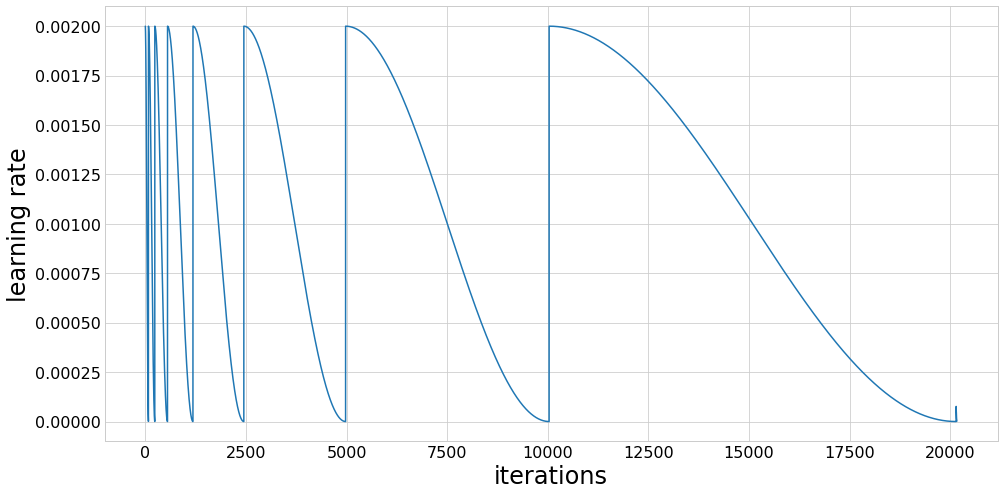

Fold took 269.679s

Training model 8 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.363385). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182096). Check your callbacks.
  % delta_t_median)


1 New best found: 3.903440818248782e-05
2 New best found: 3.6978340589848815e-05
3 New best found: 3.6095044398098254e-05
4 New best found: 3.5771846197894775e-05
5 New best found: 3.490731093188515e-05
6 New best found: 3.4354804395115936e-05
7 New best found: 3.424948937172303e-05
12 New best found: 3.376629762933589e-05
13 New best found: 3.341099043173017e-05
14 New best found: 3.331327332125511e-05
15 New best found: 3.3265694775036535e-05
21 New best found: 3.3171079712337816e-05
22 New best found: 3.311009942990495e-05
24 New best found: 3.310578775999602e-05
25 New best found: 3.292627814371372e-05
26 New best found: 3.273490282881539e-05
28 New best found: 3.271824799667229e-05
29 New best found: 3.265786776319146e-05
30 New best found: 3.264606563461712e-05
31 New best found: 3.26451906686998e-05
48 New best found: 3.2571853464469314e-05
49 New best found: 3.2381160430668384e-05
50 New best found: 3.2314688420592575e-05
52 New best found: 3.222542194416746e-05
58 New best fou

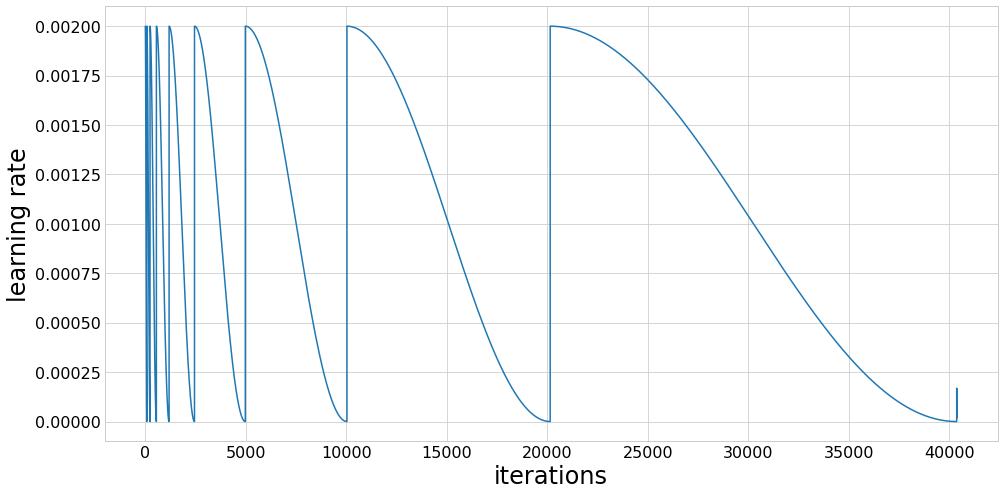

Fold took 511.507s

Training model 9 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.414927). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207858). Check your callbacks.
  % delta_t_median)


1 New best found: 4.0010154240272476e-05
2 New best found: 3.7189202385091e-05
3 New best found: 3.623182964647603e-05
5 New best found: 3.540757447607792e-05
6 New best found: 3.5218031257448955e-05
7 New best found: 3.4780873942569275e-05
10 New best found: 3.431277154965301e-05
11 New best found: 3.424408626365355e-05
12 New best found: 3.387410450321939e-05
13 New best found: 3.370432992335996e-05
14 New best found: 3.365927986485958e-05
22 New best found: 3.3555353456053996e-05
23 New best found: 3.340925686936331e-05
25 New best found: 3.3196686531339074e-05
26 New best found: 3.3140622655626506e-05
27 New best found: 3.3068303835106125e-05
28 New best found: 3.302815260430327e-05
29 New best found: 3.289964481327942e-05
30 New best found: 3.288843288548273e-05
31 New best found: 3.2886714327232866e-05
43 New best found: 3.2833568590306025e-05
51 New best found: 3.280923558959463e-05
52 New best found: 3.27686862910743e-05
54 New best found: 3.2706754616220105e-05
55 New best fou

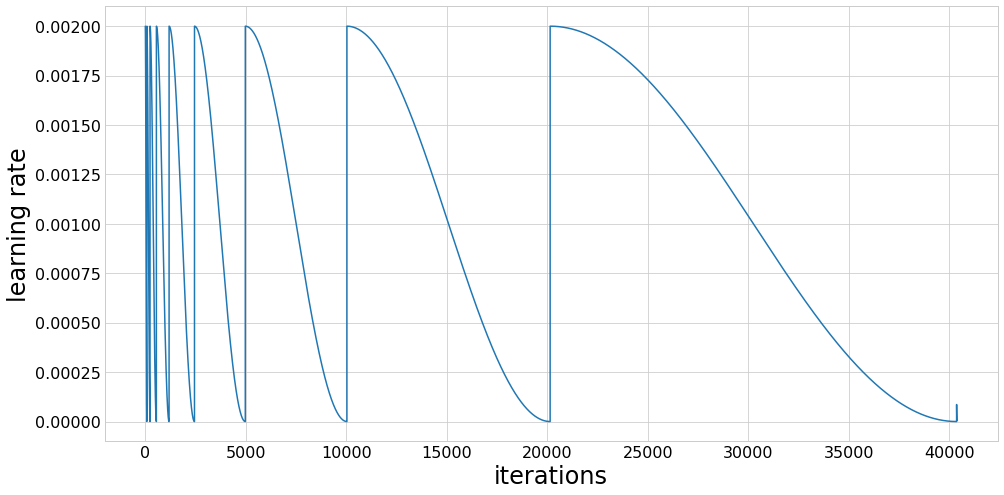

Fold took 524.596s

Training model 10 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.457909). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.229453). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8637223043769993e-05
2 New best found: 3.627908400241242e-05
3 New best found: 3.5562379152661845e-05
5 New best found: 3.494676035309743e-05
6 New best found: 3.4447457590924e-05
7 New best found: 3.432594172092847e-05
11 New best found: 3.374884966546546e-05
13 New best found: 3.3561122440261705e-05
14 New best found: 3.3509471382993695e-05
15 New best found: 3.346623798739506e-05
24 New best found: 3.333531500182016e-05
26 New best found: 3.301387512353466e-05
28 New best found: 3.2864114476296744e-05
51 New best found: 3.276609704859303e-05
52 New best found: 3.273982638471346e-05
53 New best found: 3.25924521320259e-05
54 New best found: 3.257564744007401e-05
55 New best found: 3.252082092614032e-05
60 New best found: 3.2501896500656256e-05
91 New best found: 3.2435418244244316e-05
98 New best found: 3.2366173132699896e-05
100 New best found: 3.2321025232610514e-05
107 New best found: 3.2289766283589095e-05
108 New best found: 3.224474058787514e-05
109 New best

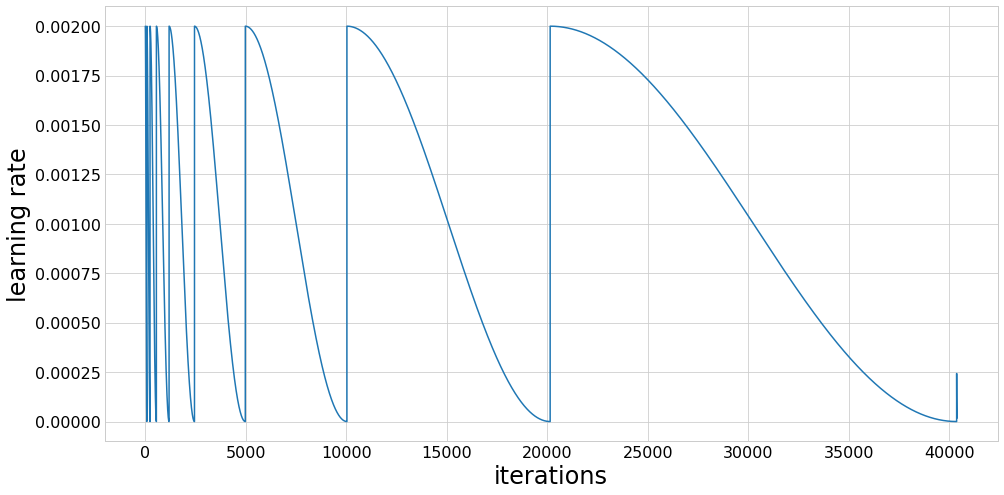

Fold took 534.202s


______________________________________
Training finished
Cross-validation took 4464.544s 


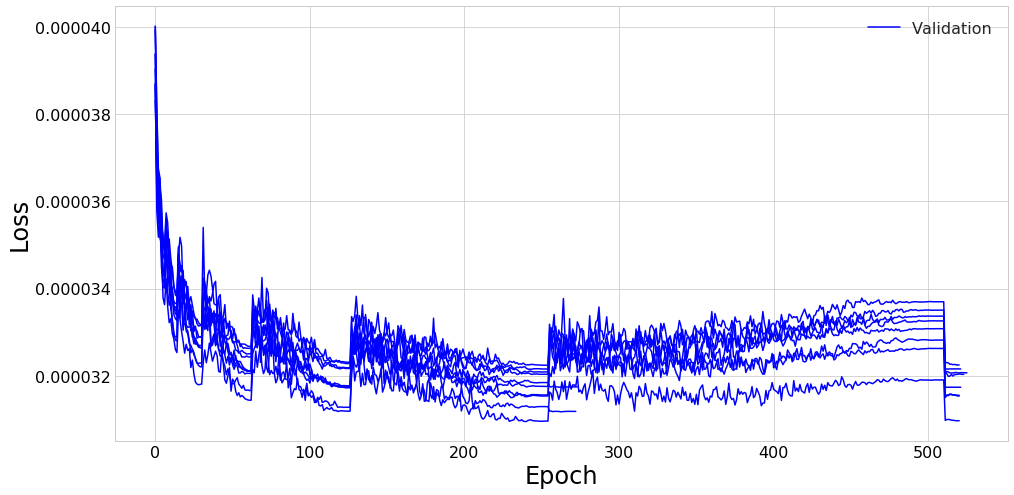

Mean loss = 3.17e-05 +- 1e-07
Mean wAUC = 0.0631 +- 0.0005
Mean AUC = 0.0986 +- 0.0006
Mean AMS = 3.97 +- 0.09
Mean cut = 0.969 +- 0.006
______________________________________



<Figure size 432x288 with 0 Axes>

In [8]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [9]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [10]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

Choosing ensemble by loss
Model 0 is 2 with loss = 3.095276973500565e-05
Model 1 is 6 with loss = 3.1174978143509884e-05
Model 2 is 7 with loss = 3.149992611724883e-05
Model 3 is 1 with loss = 3.1544435300502094e-05
Model 4 is 0 with loss = 3.1739612734963885e-05
Model 5 is 4 with loss = 3.1739811778243166e-05
Model 6 is 9 with loss = 3.198743469973146e-05
Model 7 is 8 with loss = 3.2064594025995185e-05
Model 8 is 5 with loss = 3.2149986493640546e-05
Model 9 is 3 with loss = 3.2239321067754645e-05


## Response on validation data without TTA

In [11]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [12]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0017778907435014844s per sample

Predicting fold 2 out of 10
Prediction took 0.00033318263087421654s per sample

Predicting fold 3 out of 10
Prediction took 0.0003382802909240127s per sample

Predicting fold 4 out of 10
Prediction took 0.0003317533202469349s per sample

Predicting fold 5 out of 10
Prediction took 0.0003368683228269219s per sample

Predicting fold 6 out of 10
Prediction took 0.00033778870813548563s per sample

Predicting fold 7 out of 10
Prediction took 0.00034513124991208315s per sample

Predicting fold 8 out of 10
Prediction took 0.00033407442551106216s per sample

Predicting fold 9 out of 10
Prediction took 0.0003351911364123225s per sample

Predicting fold 10 out of 10
Prediction took 0.00033767191171646117s per sample



In [13]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9035267400378053, weighted 0.9362489971771452


In [14]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(3.968719482143016, 0.96298087)

In [15]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=4.0+-0.2, at mean cut of 0.96+-0.01
Exact mean cut 0.9607215095311403, corresponds to calc_ams of 3.9585741278155946
CPU times: user 2.57 s, sys: 17.1 s, total: 19.7 s
Wall time: 2min 8s


(4.0, 0.96)

With test-time augmentation we improve on 4_Model_Swish_Cyclical-LR in all metrics on validation data: overall AMS 3.77->3.90, AMS corresponding to mean cut 3.72->3.89.

## Response on validation data with TTA

In [16]:
val_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'val.hdf5', "r+"), input_pipe=input_pipe,
                                  rotate = True, reflect = True, rot_mult=8)

In [17]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.011406731430441141s per sample

Predicting fold 2 out of 10
Prediction took 0.011460024901665746s per sample

Predicting fold 3 out of 10
Prediction took 0.01143222895078361s per sample

Predicting fold 4 out of 10
Prediction took 0.011484787766076624s per sample

Predicting fold 5 out of 10
Prediction took 0.011379523420892657s per sample

Predicting fold 6 out of 10
Prediction took 0.011491438468173146s per sample

Predicting fold 7 out of 10
Prediction took 0.011430812008865178s per sample

Predicting fold 8 out of 10
Prediction took 0.011435552875138819s per sample

Predicting fold 9 out of 10
Prediction took 0.01151608685925603s per sample

Predicting fold 10 out of 10
Prediction took 0.01147280877418816s per sample



In [18]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9037240702757625, weighted 0.9363245699205239


In [19]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(3.9594622637182373, 0.96103084)

In [20]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=4.0+-0.2, at mean cut of 0.96+-0.01
Exact mean cut 0.9600071883760393, corresponds to calc_ams of 3.902575831533778
CPU times: user 2.48 s, sys: 15.2 s, total: 17.7 s
Wall time: 2min 8s


(4.0, 0.96)

Adding test-time augmentation provides further benefits: overall AMS 3.90->3.97, AMS corresponding to mean cut 3.89->3.91.

# Test scoring - Without TTA

In [21]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [22]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.00034873873591423035s per sample

Predicting fold 2 out of 10
Prediction took 0.0003497110721909187s per sample

Predicting fold 3 out of 10
Prediction took 0.0003472229100933129s per sample

Predicting fold 4 out of 10
Prediction took 0.00034933324662799186s per sample

Predicting fold 5 out of 10
Prediction took 0.00034424030990763146s per sample

Predicting fold 6 out of 10
Prediction took 0.0003482277904383161s per sample

Predicting fold 7 out of 10
Prediction took 0.0003481367886574431s per sample

Predicting fold 8 out of 10
Prediction took 0.000345073349181224s per sample

Predicting fold 9 out of 10
Prediction took 0.0003468364294449037s per sample

Predicting fold 10 out of 10
Prediction took 0.00034741582436995073s per sample

CPU times: user 3min 25s, sys: 11.8 s, total: 3min 37s
Wall time: 3min 11s


In [23]:
score_test_data(test_fy.source, 0.9607215095311403)

Public:Private AMS: 3.715151224365118 : 3.813126816836433


(3.715151224365118, 3.813126816836433)

Using the cuts we optimised by bootstrapping the validation data, we end up with a private score which would have beaten the winning entry (3.817 c.f. 3.806). It would be nice if the public score were higher, though.

# Test scoring - With TTA

In [24]:
test_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'testing.hdf5', "r+"), input_pipe=input_pipe,
                                   rotate = True, reflect = True, rot_mult=8)

In [25]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.011297398748248816s per sample

Predicting fold 2 out of 10
Prediction took 0.01134324536072937s per sample

Predicting fold 3 out of 10
Prediction took 0.01131930036048659s per sample

Predicting fold 4 out of 10
Prediction took 0.011263592444800517s per sample

Predicting fold 5 out of 10
Prediction took 0.011299807958338749s per sample

Predicting fold 6 out of 10
Prediction took 0.011329839019849896s per sample

Predicting fold 7 out of 10
Prediction took 0.011285582641952417s per sample

Predicting fold 8 out of 10
Prediction took 0.011339580422589047s per sample

Predicting fold 9 out of 10
Prediction took 0.011306864816492254s per sample

Predicting fold 10 out of 10
Prediction took 0.011292398304509168s per sample

CPU times: user 1h 51min 31s, sys: 6min 7s, total: 1h 57min 39s
Wall time: 1h 43min 39s


In [26]:
score_test_data(test_fy.source, 0.9600071883760393)

Public:Private AMS: 3.7204556635916965 : 3.817975935401057


(3.7204556635916965, 3.817975935401057)

Using the cuts we optimised by bootstrapping the validation data, we end up with a private score which would have beaten the winning entry (3.817 c.f. 3.806). It would be nice if the public score were higher, though.

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)